In [65]:
# Creating the model
ai_brain = Sequential([
    Dense(20,input_shape=(8,)),
    Dense(32,activation='relu'),
    Dense(44,activation='relu'),
    Dense(56,activation='relu'),
    Dense(68,activation='relu'),
    Dense(70,activation='relu'),
    Dense(82,activation='relu'),
    Dense(4,activation='softmax')
])

In [66]:
import pandas as pd
import numpy as np

In [67]:
df=pd.read_csv("customers.csv")

In [68]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [69]:
df=df.dropna(axis=0)

In [70]:
df["Segmentation"].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [71]:
import tensorflow as tf

x=df.drop(["Segmentation","Var_1","ID"],axis=1)
y=df[["Segmentation"]].values

In [72]:
df["Gender"].unique(),df["Ever_Married"].unique(),df["Graduated"].unique(),df["Profession"].unique(),df["Spending_Score"].unique()

(array(['Male', 'Female'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
        'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
       dtype=object),
 array(['Low', 'High', 'Average'], dtype=object))

In [73]:
from sklearn.preprocessing import OneHotEncoder

lr=OneHotEncoder()
lr.fit(y)
lr.categories_
y=lr.transform(y).toarray()
y

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [74]:
from sklearn.preprocessing import OrdinalEncoder

lst=[['Male', 'Female'],['No', 'Yes'],['No', 'Yes'],['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor','Homemaker', 'Entertainment', 'Marketing', 'Executive'],['Low', 'High', 'Average']]

enc = OrdinalEncoder(categories=lst)

x[['Gender','Ever_Married','Graduated','Profession','Spending_Score']] = enc.fit_transform(x[['Gender',
                                                                 'Ever_Married',
                                                                 'Graduated','Profession',
                                                                 'Spending_Score']])

x=x.drop(["Age","Work_Experience","Family_Size"],axis=1)

x=x.values

In [83]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.10,
                                               random_state=50)

model=tf.keras.Sequential([tf.keras.layers.Input(shape=(5,)),
                           tf.keras.layers.Dense(4,activation="relu"),
                           tf.keras.layers.Dense(8,activation="relu"),
                           tf.keras.layers.Dense(16,activation="relu"),
                           tf.keras.layers.Dense(4,activation="softmax")])

In [84]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss=tf.keras.losses.CategoricalCrossentropy(),
                 metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 1.3817 - accuracy: 0.2967 - val_loss: 1.3459 - val_accuracy: 0.3345
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 1.3057 - accuracy: 0.3896 - val_loss: 1.2919 - val_accuracy: 0.3798
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 1.2645 - accuracy: 0.4125 - val_loss: 1.2745 - val_accuracy: 0.4070
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 1.2548 - accuracy: 0.4255 - val_loss: 1.2711 - val_accuracy: 0.4082
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 1.2504 - accuracy: 0.4286 - val_loss: 1.2686 - val_accuracy: 0.4263
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 1.2466 - accuracy: 0.4366 - val_loss: 1.2651 - val_accuracy: 0.4320
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 1.2419 - accuracy: 0.4454 - val_loss: 1.2620 - val_accuracy: 0.4297

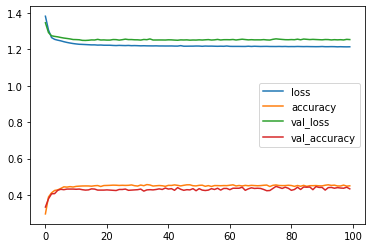

In [85]:
pd.DataFrame(model.history.history).plot()

In [86]:
y_preds=tf.argmax(model.predict(X_test),axis=1)

In [87]:
import sklearn

sklearn.metrics.classification_report(tf.argmax(y_test,axis=1),y_preds)

sklearn.metrics.confusion_matrix(tf.argmax(y_test,axis=1),y_preds)

tf.argmax(model.predict([[0., 0., 0., 6., 0.]]),axis=1)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([3])>